In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.graphics.tsaplots as sgt
import statsmodels.api as sm 

from statsmodels.tsa.stattools import adfuller, kpss

import warnings

sns.set()
warnings.filterwarnings("ignore")

In [2]:
data_backup = pd.read_csv("data.csv")
data_backup.Date = pd.to_datetime(data_backup.Date)
data_backup.set_index("Date", inplace = True)

In [3]:
data_backup.head()

,spx,spx_ret,spx_vol
Date,,,
1994-01-06,467.119995,NaN,NaN
1994-01-07,469.899994,0.595136,0.595136
1994-01-10,475.269989,1.142795,1.142795
1994-01-11,474.130005,-0.239860,0.239860
1994-01-12,474.170013,0.008438,0.008438


Taking out all the columns corresponding to **SPX** market index.

In [4]:
data = data_backup.copy()

In [5]:
data.head()

,spx,spx_ret,spx_vol
Date,,,
1994-01-06,467.119995,NaN,NaN
1994-01-07,469.899994,0.595136,0.595136
1994-01-10,475.269989,1.142795,1.142795
1994-01-11,474.130005,-0.239860,0.239860
1994-01-12,474.170013,0.008438,0.008438


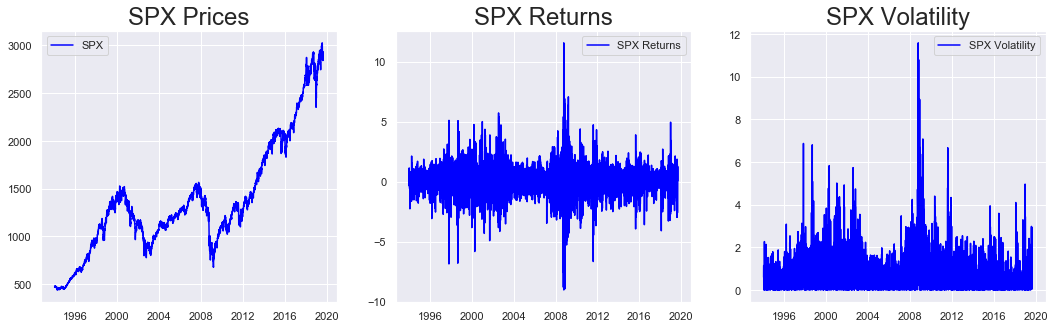

In [6]:
plt.rcParams["figure.figsize"] = (18, 5)

fig, ax = plt.subplots(1, 3)

ax[0].plot(data.spx, color = "blue", label = "SPX")
ax[0].set_title("SPX Prices", size = 24)
ax[0].legend()

ax[1].plot(data.spx_ret, color = "blue", label = "SPX Returns")
ax[1].set_title("SPX Returns", size = 24)
ax[1].legend()

ax[2].plot(data.spx_vol, color = "blue", label = "SPX Volatility")
ax[2].set_title("SPX Volatility", size = 24)
ax[2].legend()

plt.show()

In [7]:
train_df = data.loc[:"2018-12-31"]
test_df = data.loc["2019-01-01":]

In [8]:
train_df.shape

(6518, 3)

In [9]:
train_df.describe()

,spx,spx_ret,spx_vol
count,6518.000000,6517.000000,6517.000000
mean,1341.983220,0.032175,0.746124
std,551.838480,1.130007,0.849214
min,438.920013,-9.034978,0.000000
25%,1007.882523,-0.424213,0.190105
50%,1254.020020,0.028266,0.495556
75%,1507.727478,0.550266,1.006658
max,2930.750000,11.580037,11.580037


In [10]:
test_df.shape

(174, 3)

# Visualizing Train Set

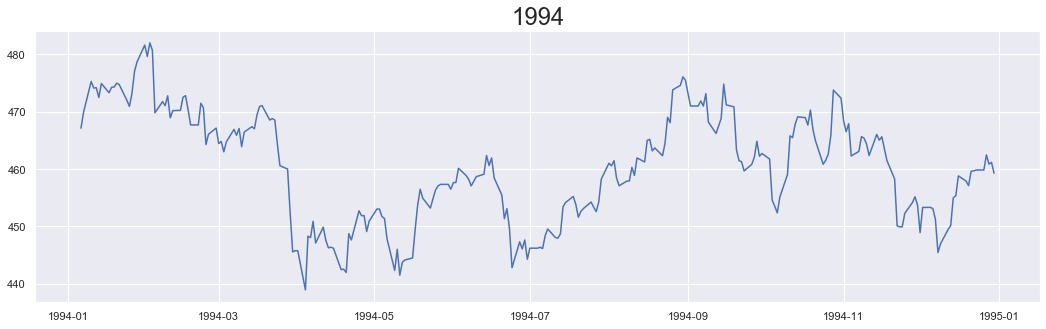

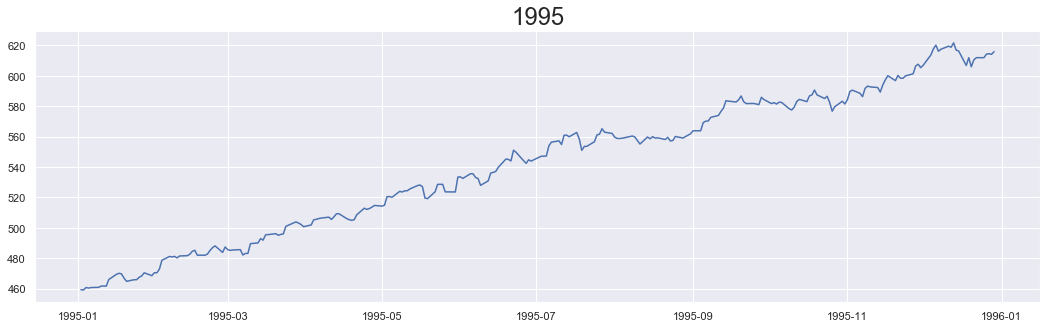

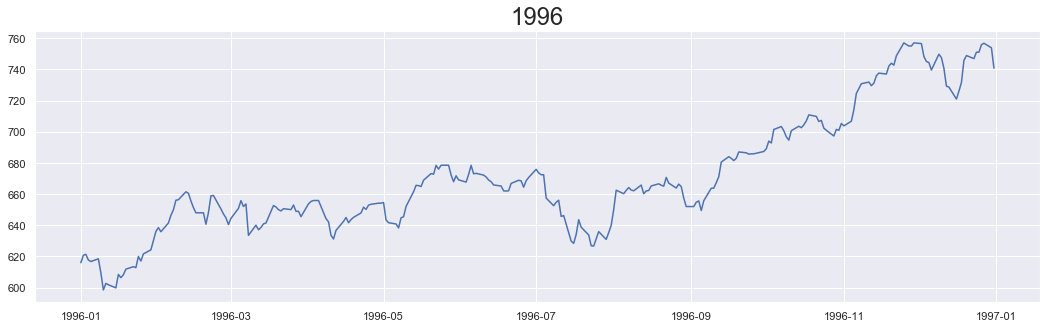

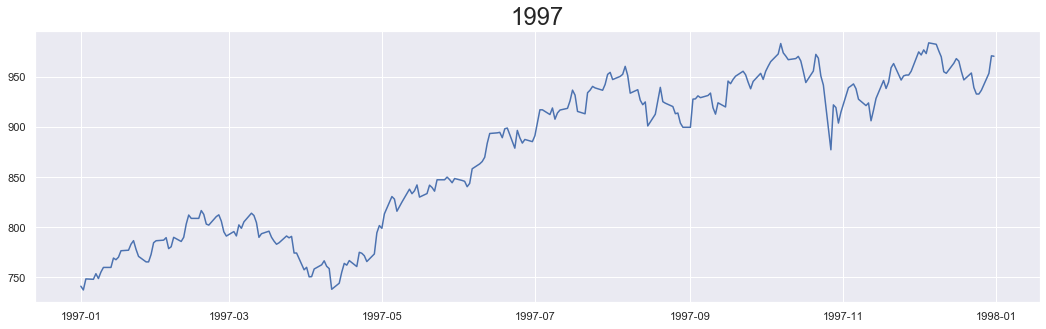

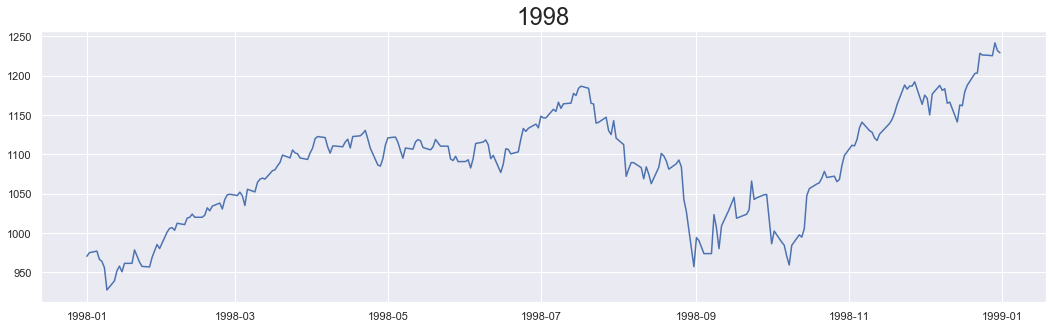

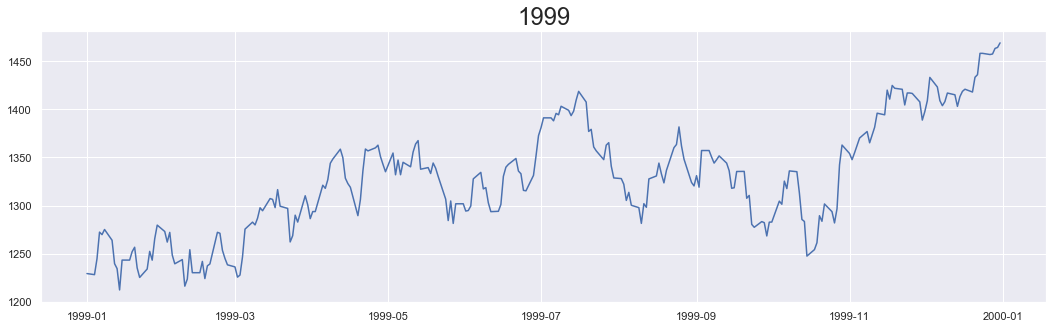

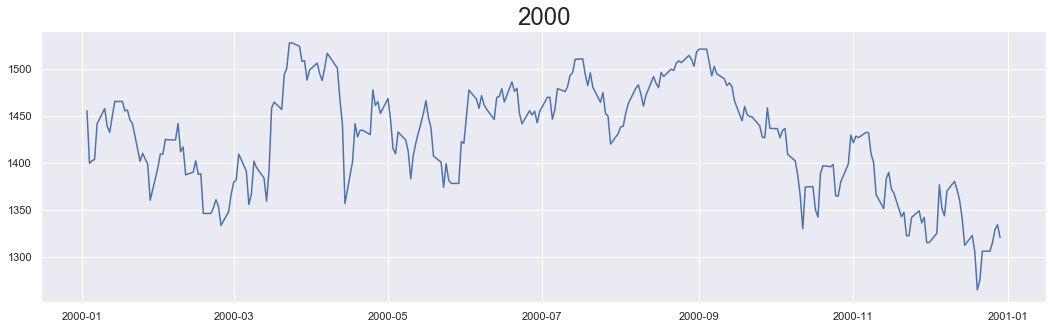

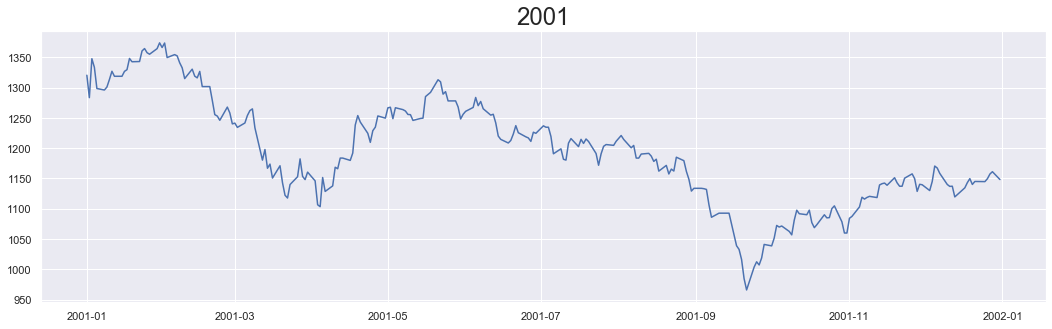

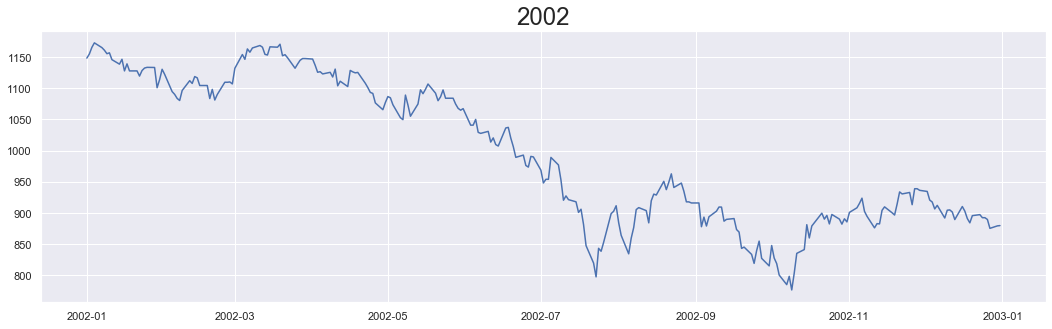

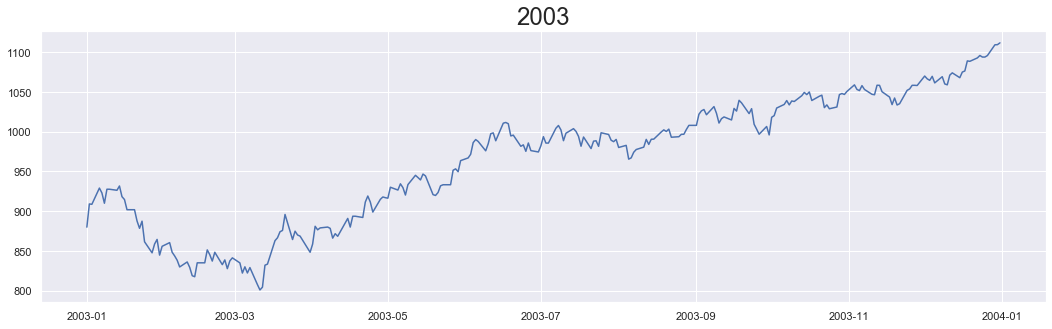

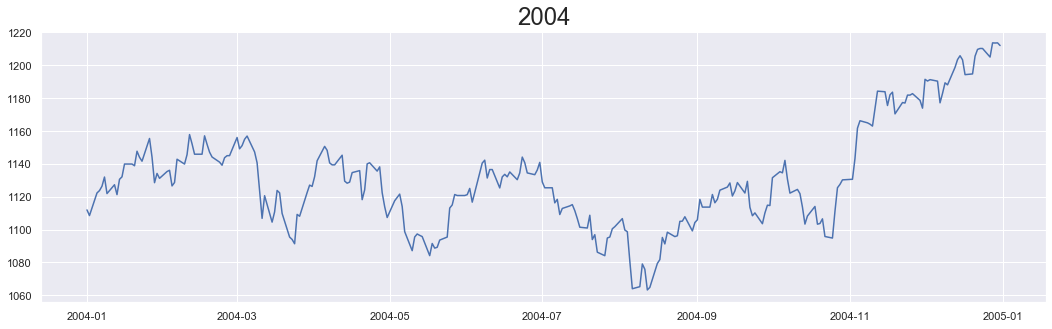

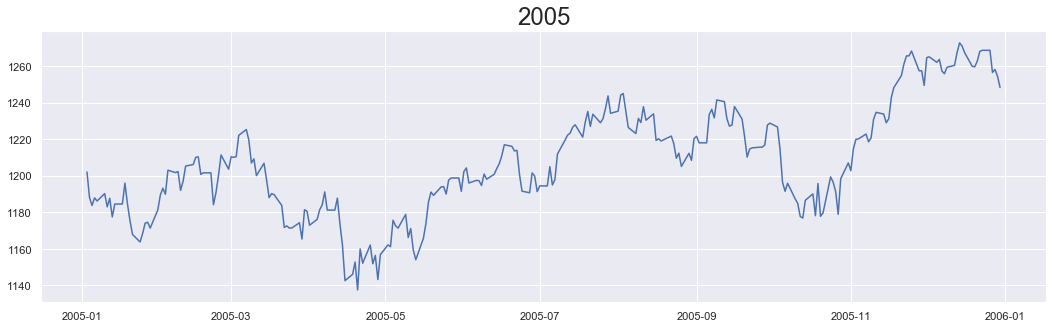

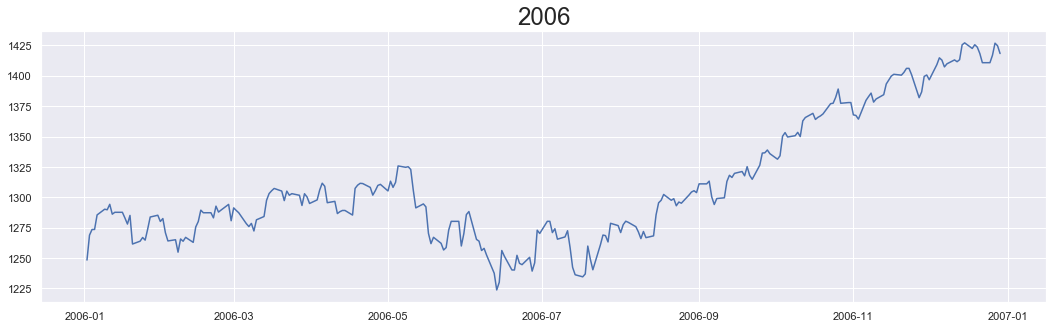

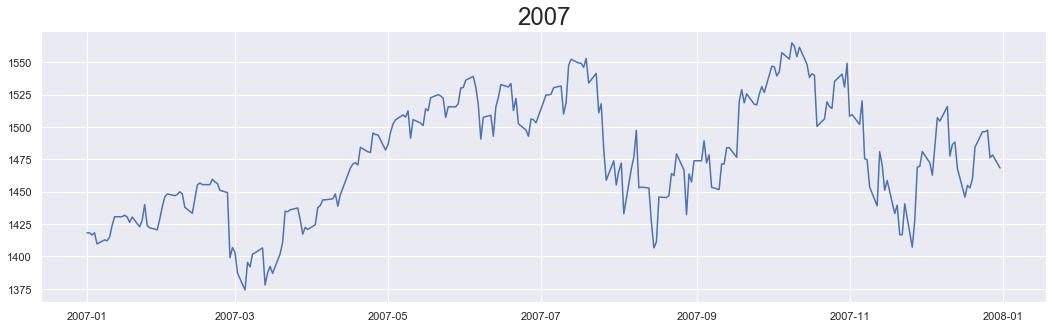

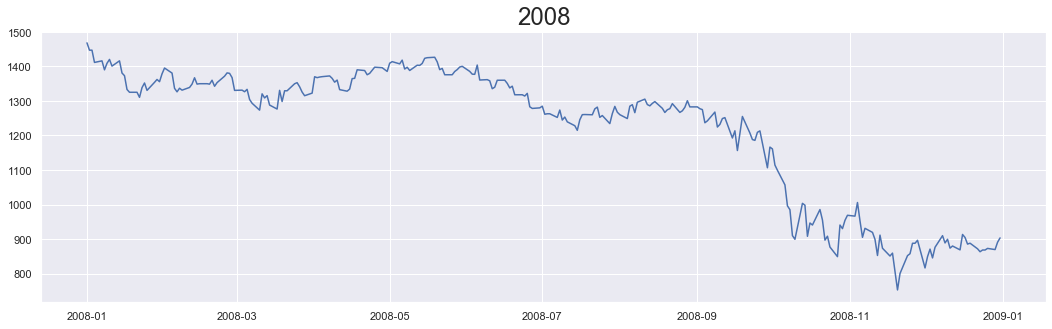

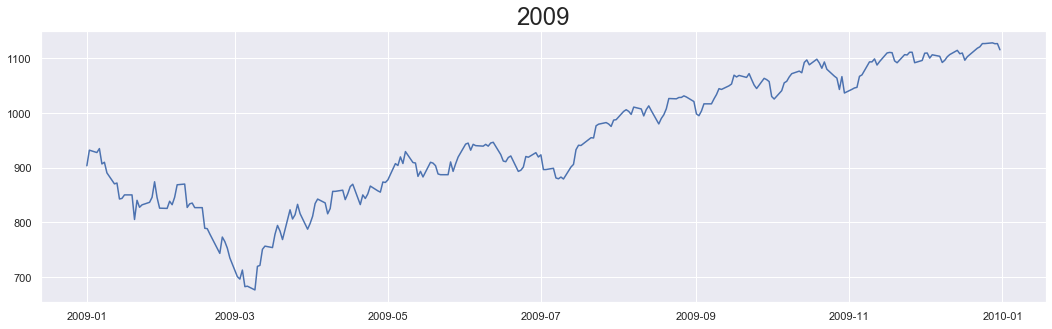

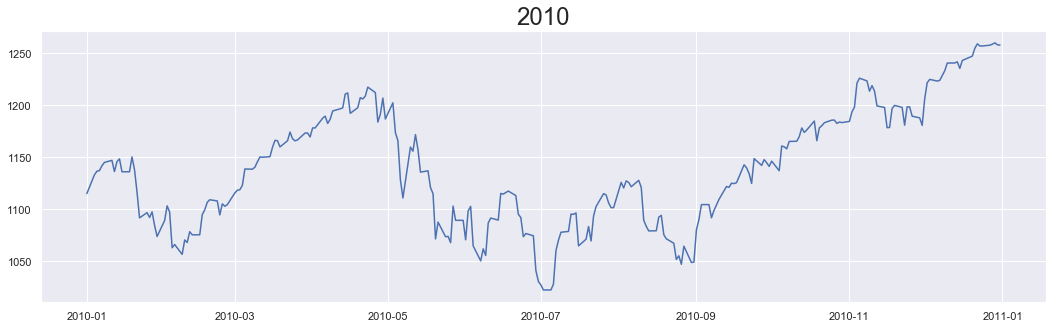

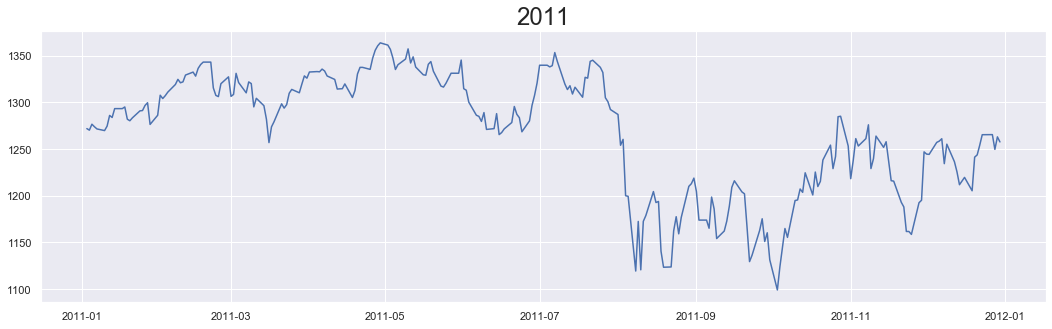

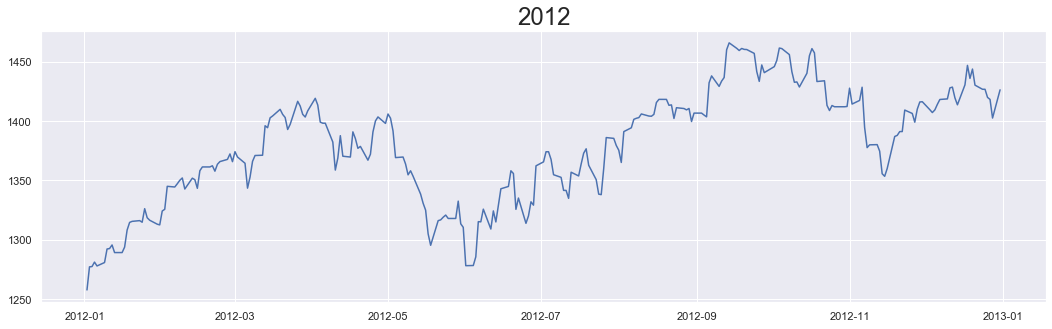

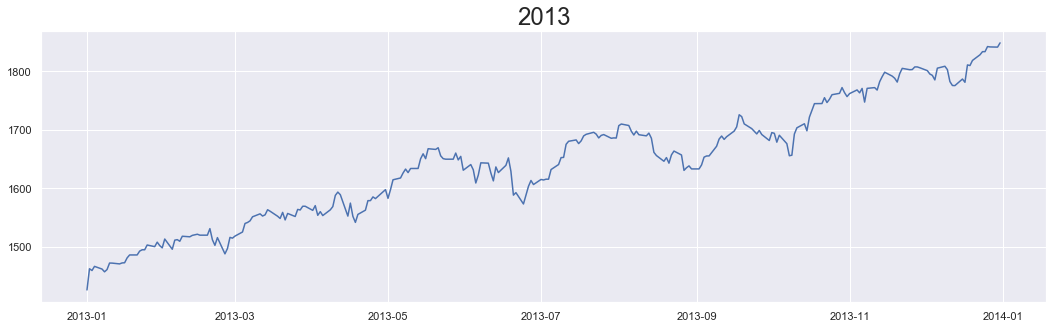

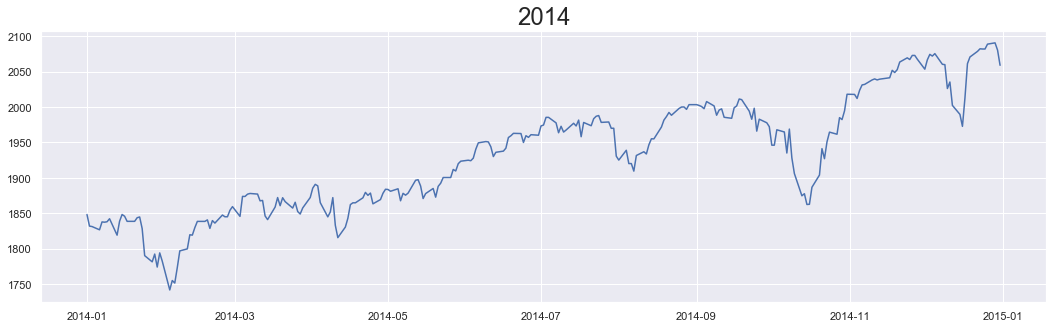

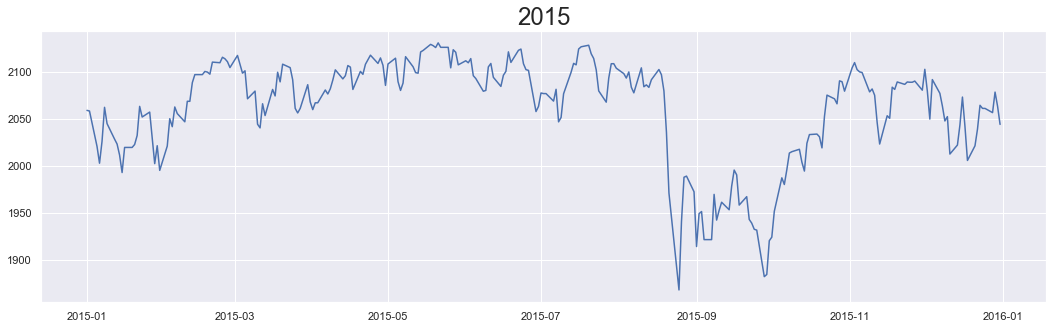

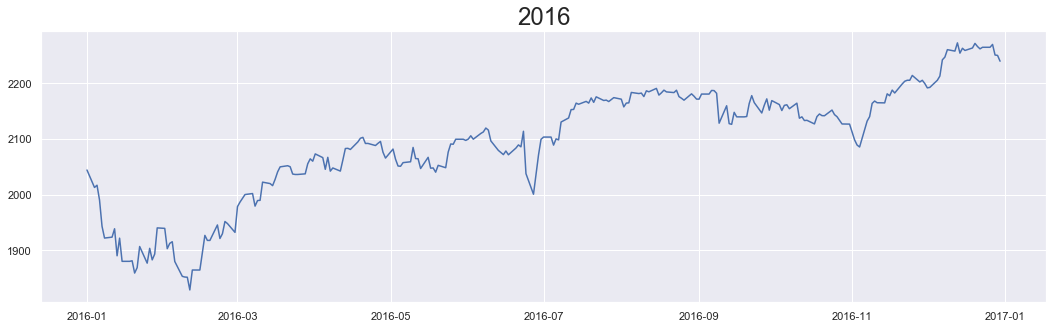

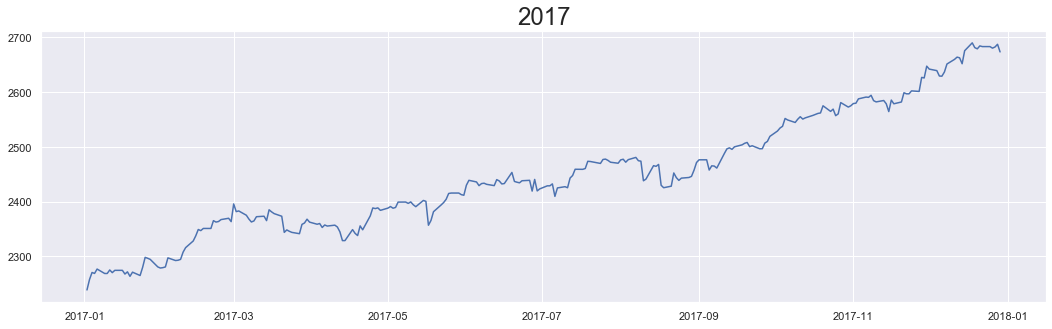

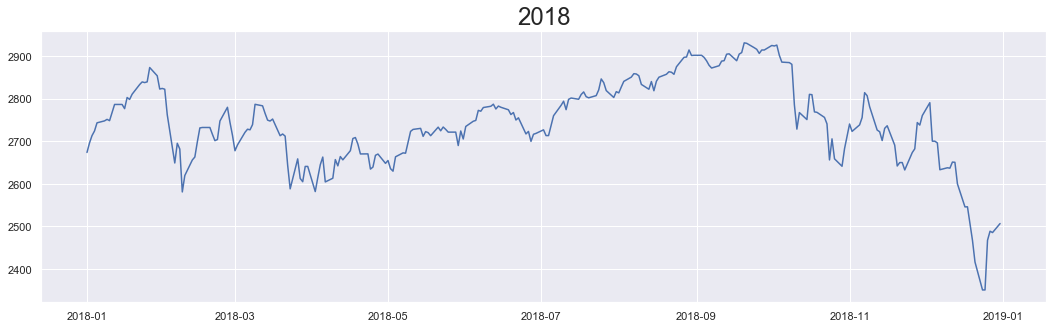

In [11]:
plt.rcParams["figure.figsize"] = 18, 5

for year in set(train_df.index.year):
    plt.plot(train_df[["spx"]].loc[train_df.index.year == year])
    plt.title(str(year), size = 24)
    plt.show()

### Box Plots

In [14]:
train_df["Year"] = train_df.index.year

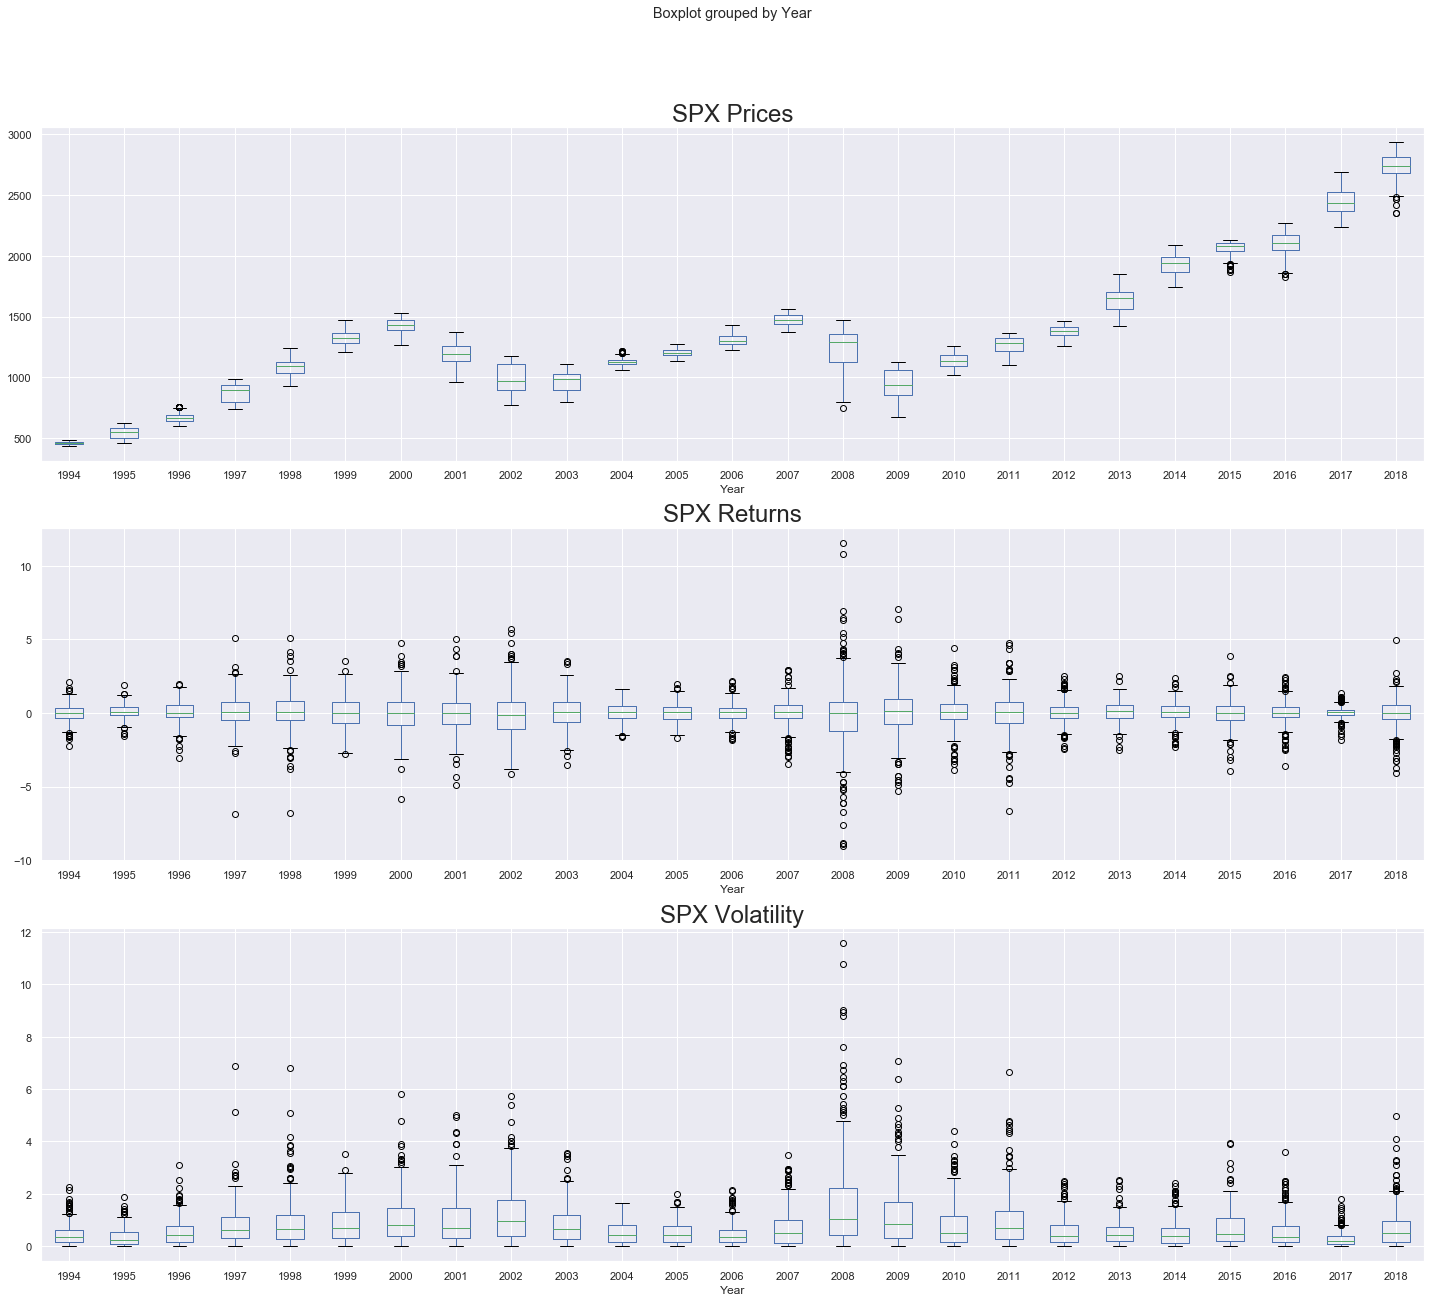

In [15]:
plt.rcParams["figure.figsize"] = 24, 21

fig, axes = plt.subplots(3, 1)

train_df.boxplot(by ='Year', column =['spx'], ax = axes[0])
axes[0].set_title("SPX Prices", size = 24)

train_df.boxplot(by ='Year', column =['spx_ret'], ax = axes[1])
axes[1].set_title("SPX Returns", size = 24)

train_df.boxplot(by ='Year', column =['spx_vol'], ax = axes[2])
axes[2].set_title("SPX Volatility", size = 24)

plt.show()

- The above plots show that SPX prices have a generally upward trend apart from a few dips experienced in early 2000s and near the years of 2008.
- The returns seem fairly steady over the years, but with some major fluctuations during the periods mentioned above.
- Similar pattern is observed in volatility plot as well.

## Distribution of Data

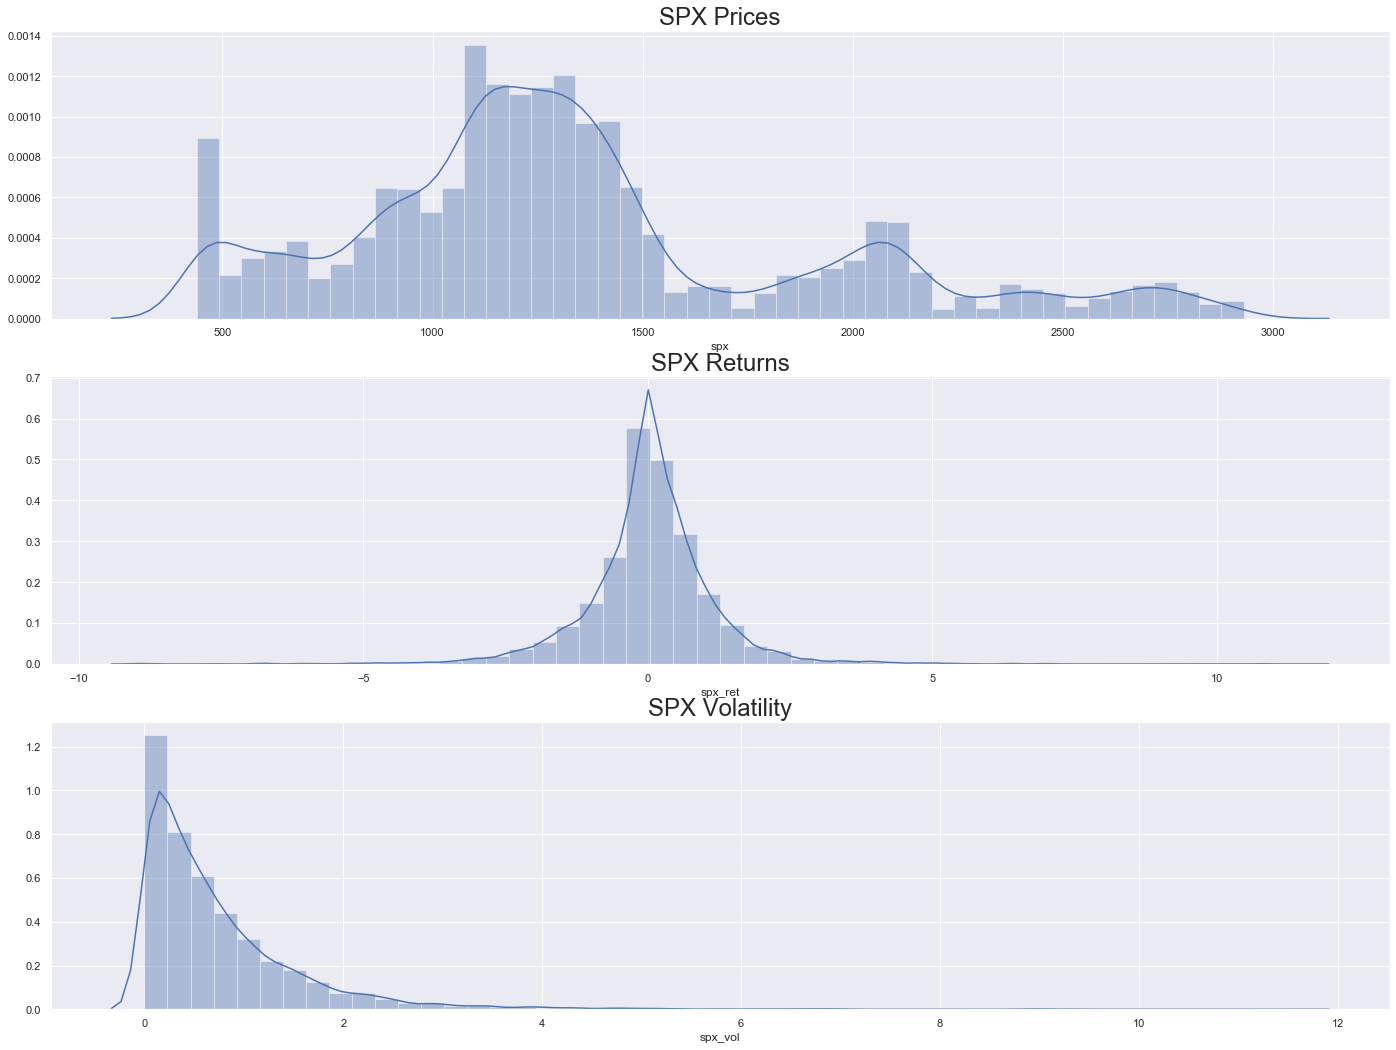

In [16]:
plt.rcParams["figure.figsize"] = 24, 18

fig, axes = plt.subplots(3, 1)

sns.distplot(train_df.spx, ax = axes[0])
sns.distplot(train_df.spx_ret, ax = axes[1])
sns.distplot(train_df.spx_vol, ax = axes[2])

axes[0].set_title("SPX Prices", size = 24)
axes[1].set_title("SPX Returns", size = 24)
axes[2].set_title("SPX Volatility", size = 24)

plt.show()

## Smoothing (Moving Average)

In this section, the underlying trends in the data is explored using a moving average technique. In this a window size is chosen and the average of all datapoints in this window size is taken. This reduces the effects of noise and produces a smoother curve.

Let's analyse all three types of SPX (prices, returns, volatility) data that we have using this technique. 

- **SPX Prices**

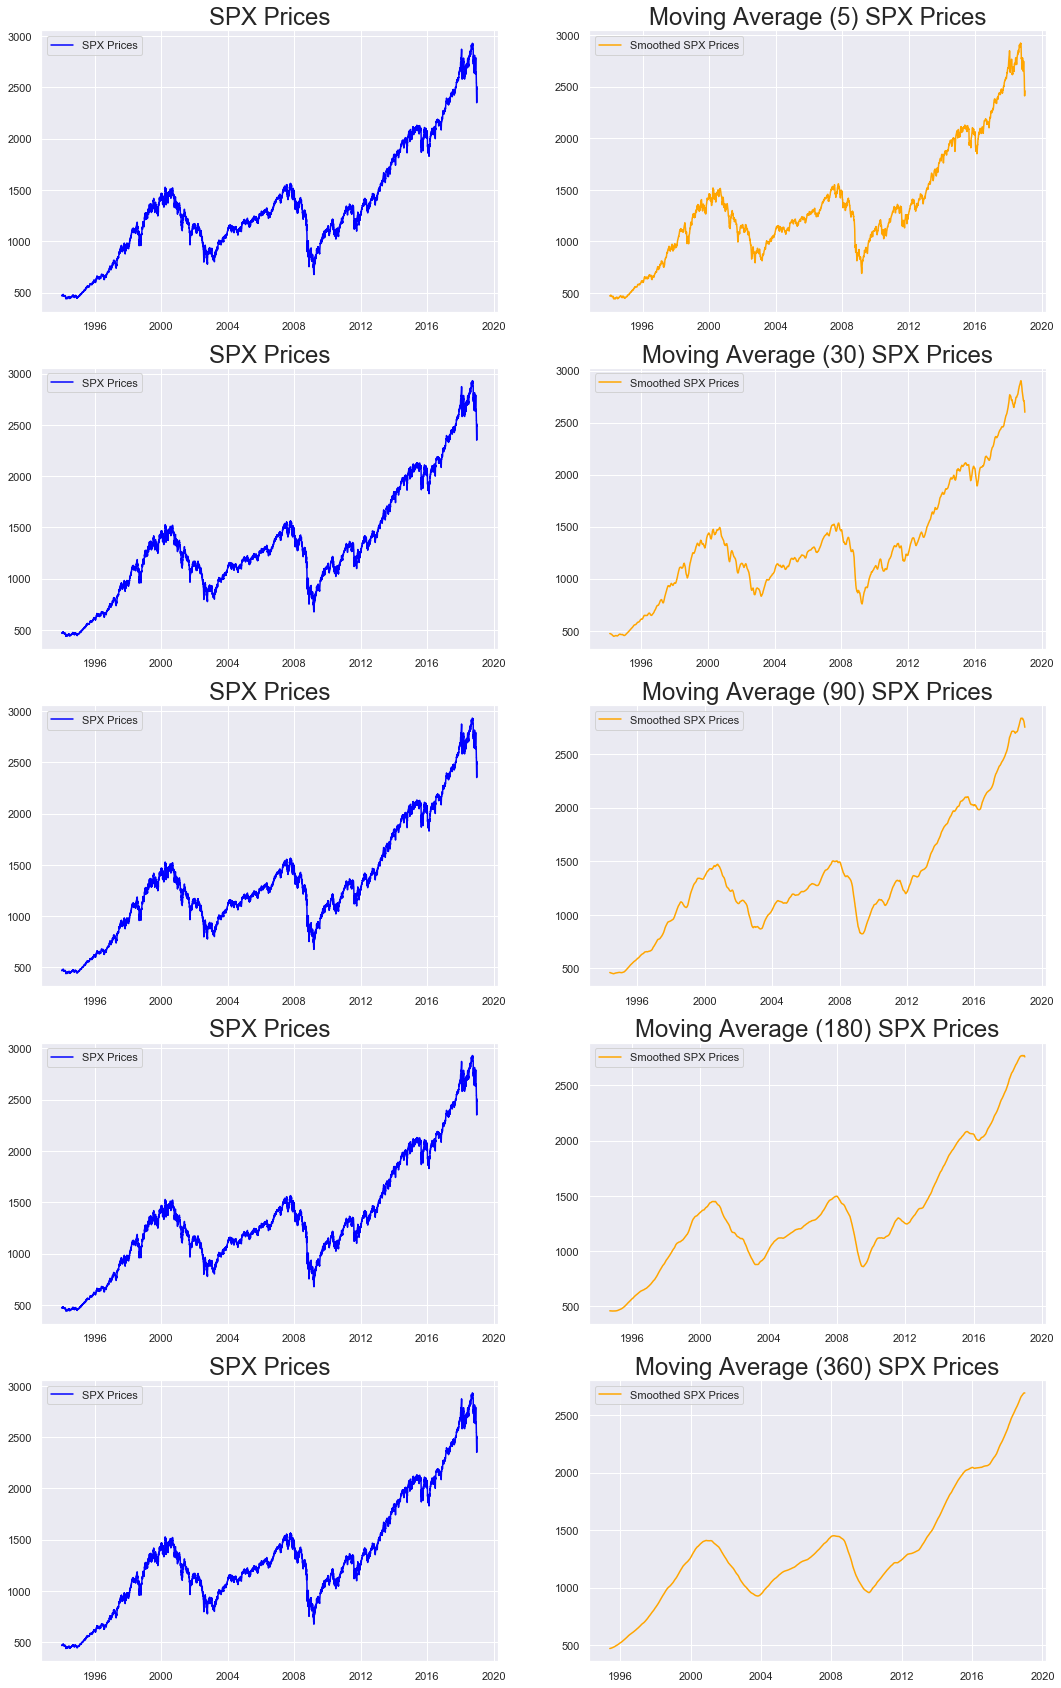

In [27]:
plt.rcParams["figure.figsize"] = 18, 30

fig, ax = plt.subplots(5, 2)

# Plots for Weekly average (Window = 5) 
ax[0, 0].plot(train_df.spx, color = "blue", label = "SPX Prices")
ax[0, 0].set_title("SPX Prices", size = 24)
ax[0, 0].legend()

ax[0, 1].plot(train_df.spx.rolling(window=5).mean(), color = "orange", label = "Smoothed SPX Prices")
ax[0, 1].set_title("Moving Average (5) SPX Prices", size = 24)
ax[0, 1].legend()


# Plots for Monthly average (Window = 30)
ax[1, 0].plot(train_df.spx, color = "blue", label = "SPX Prices")
ax[1, 0].set_title("SPX Prices", size = 24)
ax[1, 0].legend()

ax[1, 1].plot(train_df.spx.rolling(window=30).mean(), color = "orange", label = "Smoothed SPX Prices")
ax[1, 1].set_title("Moving Average (30) SPX Prices", size = 24)
ax[1, 1].legend()


# Plots for Quarterly average (Window = 5)
ax[2, 0].plot(train_df.spx, color = "blue", label = "SPX Prices")
ax[2, 0].set_title("SPX Prices", size = 24)
ax[2, 0].legend()

ax[2, 1].plot(train_df.spx.rolling(window=90).mean(), color = "orange", label = "Smoothed SPX Prices")
ax[2, 1].set_title("Moving Average (90) SPX Prices", size = 24)
ax[2, 1].legend()


# Plots for Half-yearly average (Window = 180)
ax[3, 0].plot(train_df.spx, color = "blue", label = "SPX Prices")
ax[3, 0].set_title("SPX Prices", size = 24)
ax[3, 0].legend()

ax[3, 1].plot(train_df.spx.rolling(window=180).mean(), color = "orange", label = "Smoothed SPX Prices")
ax[3, 1].set_title("Moving Average (180) SPX Prices", size = 24)
ax[3, 1].legend()


# Plots for Yearly average (Window = 360)
ax[4, 0].plot(train_df.spx, color = "blue", label = "SPX Prices")
ax[4, 0].set_title("SPX Prices", size = 24)
ax[4, 0].legend()

ax[4, 1].plot(train_df.spx.rolling(window=360).mean(), color = "orange", label = "Smoothed SPX Prices")
ax[4, 1].set_title("Moving Average (360) SPX Prices", size = 24)
ax[4, 1].legend()

plt.show()

- **SPX Returns**

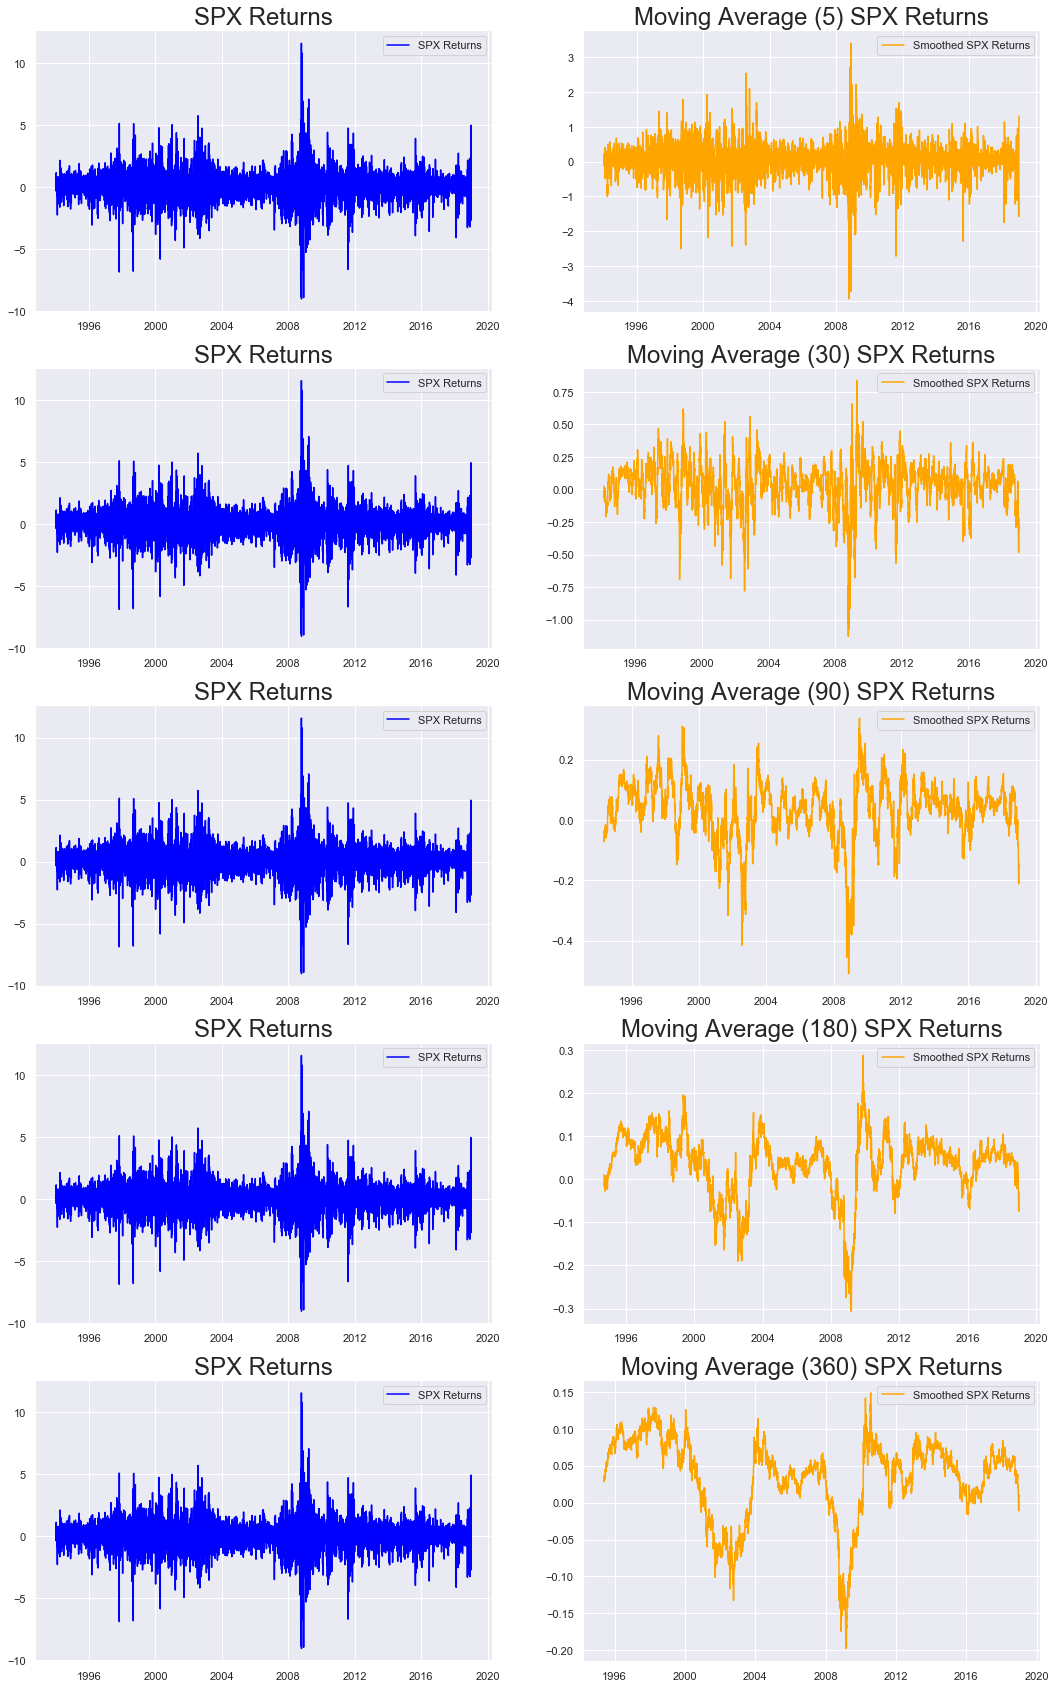

In [28]:
plt.rcParams["figure.figsize"] = 18, 30

fig, ax = plt.subplots(5, 2)

# Plots for Weekly average (Window = 5) 
ax[0, 0].plot(train_df.spx_ret[1:], color = "blue", label = "SPX Returns")
ax[0, 0].set_title("SPX Returns", size = 24)
ax[0, 0].legend()

ax[0, 1].plot(train_df.spx_ret[1:].rolling(window=5).mean(), color = "orange", label = "Smoothed SPX Returns")
ax[0, 1].set_title("Moving Average (5) SPX Returns", size = 24)
ax[0, 1].legend()


# Plots for Monthly average (Window = 30)
ax[1, 0].plot(train_df.spx_ret[1:], color = "blue", label = "SPX Returns")
ax[1, 0].set_title("SPX Returns", size = 24)
ax[1, 0].legend()

ax[1, 1].plot(train_df.spx_ret[1:].rolling(window=30).mean(), color = "orange", label = "Smoothed SPX Returns")
ax[1, 1].set_title("Moving Average (30) SPX Returns", size = 24)
ax[1, 1].legend()


# Plots for Quarterly average (Window = 5)
ax[2, 0].plot(train_df.spx_ret[1:], color = "blue", label = "SPX Returns")
ax[2, 0].set_title("SPX Returns", size = 24)
ax[2, 0].legend()

ax[2, 1].plot(train_df.spx_ret[1:].rolling(window=90).mean(), color = "orange", label = "Smoothed SPX Returns")
ax[2, 1].set_title("Moving Average (90) SPX Returns", size = 24)
ax[2, 1].legend()


# Plots for Half-yearly average (Window = 180)
ax[3, 0].plot(train_df.spx_ret[1:], color = "blue", label = "SPX Returns")
ax[3, 0].set_title("SPX Returns", size = 24)
ax[3, 0].legend()

ax[3, 1].plot(train_df.spx_ret[1:].rolling(window=180).mean(), color = "orange", label = "Smoothed SPX Returns")
ax[3, 1].set_title("Moving Average (180) SPX Returns", size = 24)
ax[3, 1].legend()


# Plots for Yearly average (Window = 360)
ax[4, 0].plot(train_df.spx_ret[1:], color = "blue", label = "SPX Returns")
ax[4, 0].set_title("SPX Returns", size = 24)
ax[4, 0].legend()

ax[4, 1].plot(train_df.spx_ret[1:].rolling(window=360).mean(), color = "orange", label = "Smoothed SPX Returns")
ax[4, 1].set_title("Moving Average (360) SPX Returns", size = 24)
ax[4, 1].legend()

plt.show()

- **SPX Volatility**

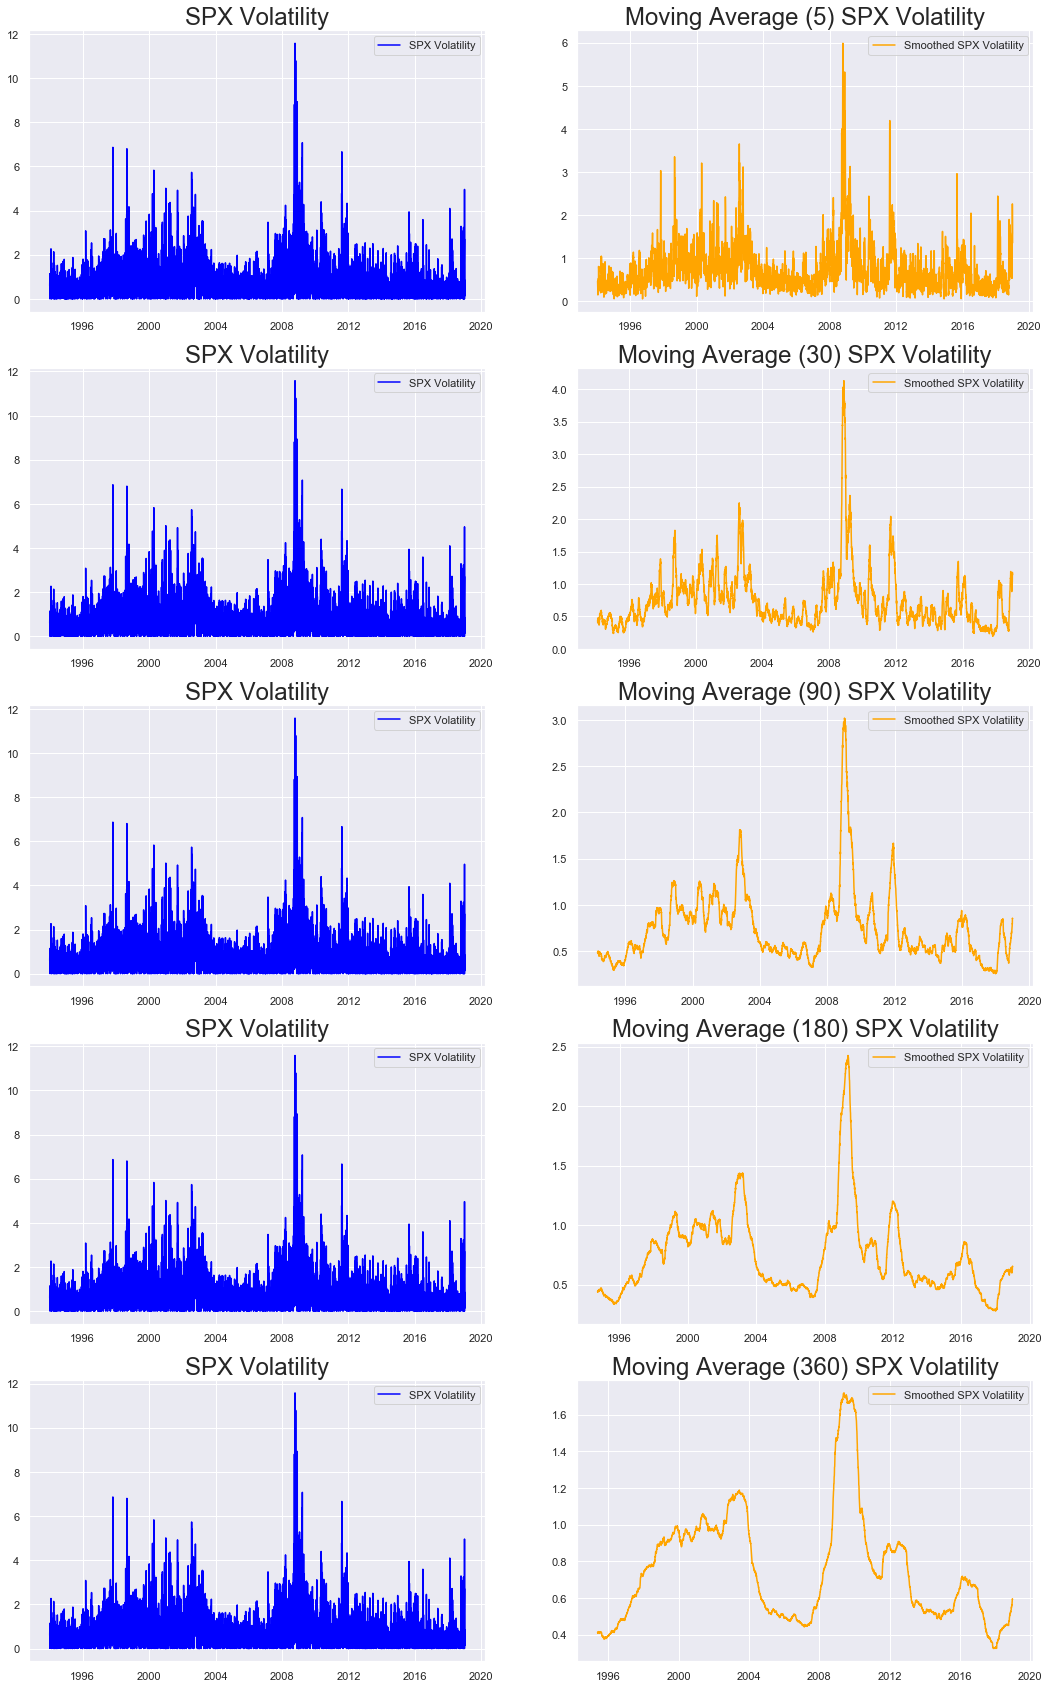

In [29]:
plt.rcParams["figure.figsize"] = 18, 30

fig, ax = plt.subplots(5, 2)

# Plots for Weekly average (Window = 5) 
ax[0, 0].plot(train_df.spx_vol[1:], color = "blue", label = "SPX Volatility")
ax[0, 0].set_title("SPX Volatility", size = 24)
ax[0, 0].legend()

ax[0, 1].plot(train_df.spx_vol[1:].rolling(window=5).mean(), color = "orange", label = "Smoothed SPX Volatility")
ax[0, 1].set_title("Moving Average (5) SPX Volatility", size = 24)
ax[0, 1].legend()


# Plots for Monthly average (Window = 30)
ax[1, 0].plot(train_df.spx_vol[1:], color = "blue", label = "SPX Volatility")
ax[1, 0].set_title("SPX Volatility", size = 24)
ax[1, 0].legend()

ax[1, 1].plot(train_df.spx_vol[1:].rolling(window=30).mean(), color = "orange", label = "Smoothed SPX Volatility")
ax[1, 1].set_title("Moving Average (30) SPX Volatility", size = 24)
ax[1, 1].legend()


# Plots for Quarterly average (Window = 5)
ax[2, 0].plot(train_df.spx_vol[1:], color = "blue", label = "SPX Volatility")
ax[2, 0].set_title("SPX Volatility", size = 24)
ax[2, 0].legend()

ax[2, 1].plot(train_df.spx_vol[1:].rolling(window=90).mean(), color = "orange", label = "Smoothed SPX Volatility")
ax[2, 1].set_title("Moving Average (90) SPX Volatility", size = 24)
ax[2, 1].legend()


# Plots for Half-yearly average (Window = 180)
ax[3, 0].plot(train_df.spx_vol[1:], color = "blue", label = "SPX Volatility")
ax[3, 0].set_title("SPX Volatility", size = 24)
ax[3, 0].legend()

ax[3, 1].plot(train_df.spx_vol[1:].rolling(window=180).mean(), color = "orange", label = "Smoothed SPX Volatility")
ax[3, 1].set_title("Moving Average (180) SPX Volatility", size = 24)
ax[3, 1].legend()


# Plots for Yearly average (Window = 360)
ax[4, 0].plot(train_df.spx_vol[1:], color = "blue", label = "SPX Volatility")
ax[4, 0].set_title("SPX Volatility", size = 24)
ax[4, 0].legend()

ax[4, 1].plot(train_df.spx_vol[1:].rolling(window=360).mean(), color = "orange", label = "Smoothed SPX Volatility")
ax[4, 1].set_title("Moving Average (360) SPX Volatility", size = 24)
ax[4, 1].legend()

plt.show()

The above plots show the underlying trend in the data by taking a moving average of the data with a different window each time. As the window size increases the curves become much more smoother and the trend is better revealed.

Using this technique, it is apparent that in which time intervals, the market was in general giving strong returns, when the market was relatively stable, and what has been the overall trend in the market in different time intervals. 

## Correlation Plots

In these plots, we examine the relationship that the data has with its lagged versions using the following Correlation plots. This helps us in figuring out possible patterns/trends in the data that can then be used as features in forecasting models.

### ACF

ACF Plots for the first **40 lags** will show how correlated the data is when compared to data upto a month before.

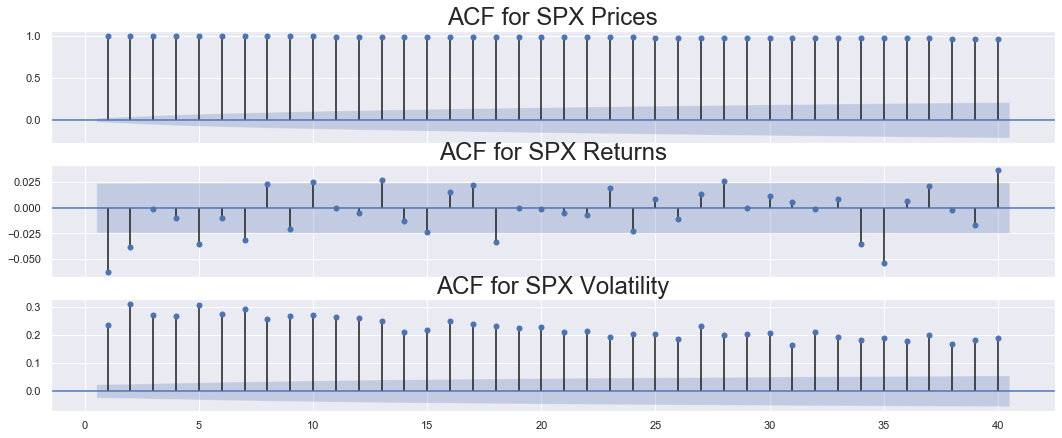

In [30]:
plt.rcParams["figure.figsize"] = 18, 7

fig, axes = plt.subplots(3, 1, sharex = True)

sgt.plot_acf(train_df.spx, zero = False, lags = 40, ax = axes[0])
sgt.plot_acf(train_df.spx_ret[1:], zero = False, lags = 40, ax = axes[1])
sgt.plot_acf(train_df.spx_vol[1:], zero = False, lags = 40, ax = axes[2])

axes[0].set_title("ACF for SPX Prices", size = 24)
axes[1].set_title("ACF for SPX Returns", size = 24)
axes[2].set_title("ACF for SPX Volatility", size = 24)

plt.show()

ACF Plots for the first **90 lags** will show how correlated the data is when compared to data upto a quarter year before.

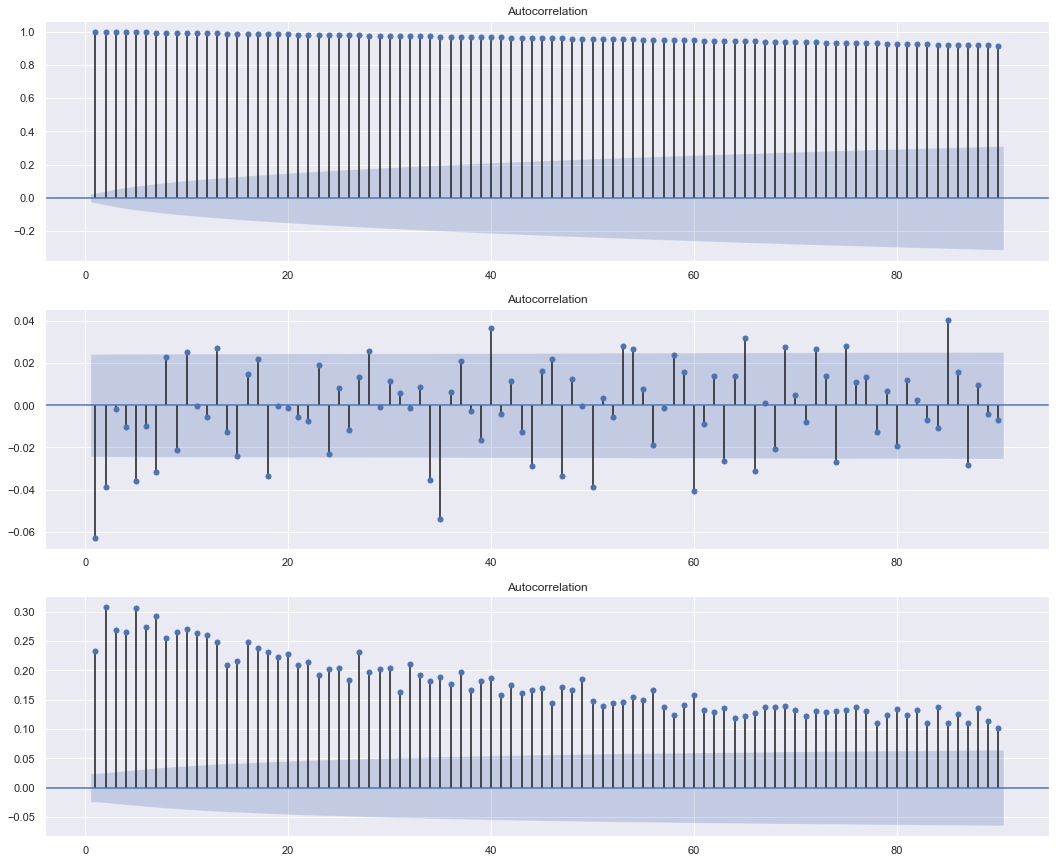

In [31]:
plt.rcParams["figure.figsize"] = 18, 15

fig, axes = plt.subplots(3, 1)

sgt.plot_acf(train_df.spx, zero = False, lags = 90, ax = axes[0])
sgt.plot_acf(train_df.spx_ret[1:], zero = False, lags = 90, ax = axes[1])
sgt.plot_acf(train_df.spx_vol[1:], zero = False, lags = 90, ax = axes[2])

plt.show()

ACF Plots for the first **180 lags** will show how correlated the data is when compared to data upto half a year before.

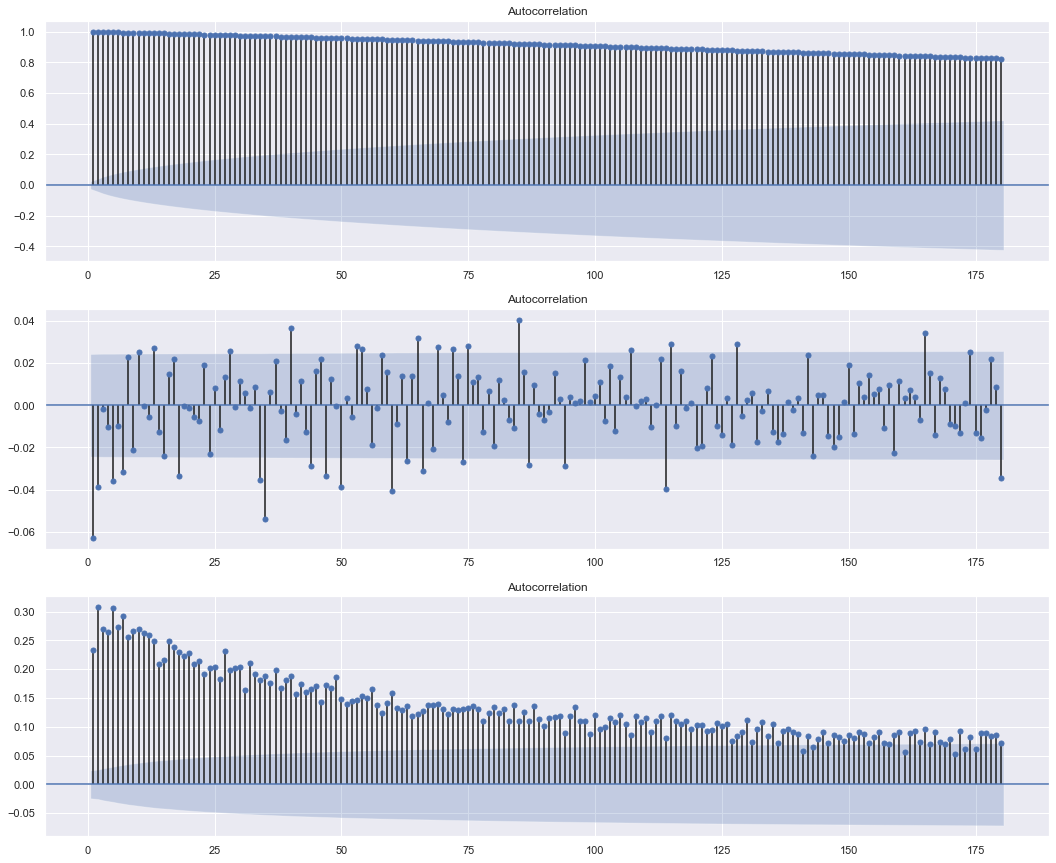

In [32]:
plt.rcParams["figure.figsize"] = 18, 15

fig, axes = plt.subplots(3, 1)

sgt.plot_acf(train_df.spx, zero = False, lags = 180, ax = axes[0])
sgt.plot_acf(train_df.spx_ret[1:], zero = False, lags = 180, ax = axes[1])
sgt.plot_acf(train_df.spx_vol[1:], zero = False, lags = 180, ax = axes[2])

plt.show()

ACF Plots for the first **360 lags** will show how correlated the data is when compared to data upto a year before.

## Stationarity Check

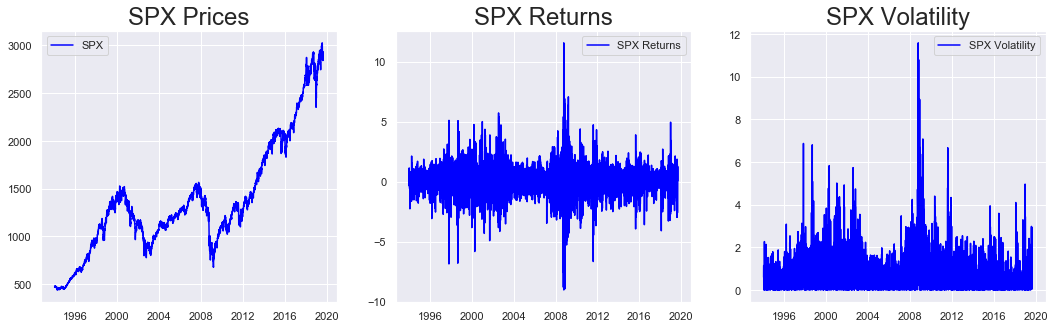

In [38]:
plt.rcParams["figure.figsize"] = (18, 5)

fig, ax = plt.subplots(1, 3)

ax[0].plot(data.spx, color = "blue", label = "SPX")
ax[0].set_title("SPX Prices", size = 24)
ax[0].legend()

ax[1].plot(data.spx_ret, color = "blue", label = "SPX Returns")
ax[1].set_title("SPX Returns", size = 24)
ax[1].legend()

ax[2].plot(data.spx_vol, color = "blue", label = "SPX Volatility")
ax[2].set_title("SPX Volatility", size = 24)
ax[2].legend()

plt.show()

- There is a clear trend (upward) in **SPX Prices**. So it clearly is not stationary.
- The trends in **Volatility** and **Returns** of **SPX** is not visibly apparent, so let us analyse them further.

### Summary Statistics

Another way to test for stationarity is to check for summary statistics (mean, variance, co-variance etc.) over a range of time periods. For Stationary datasets, these values are fairly constant.

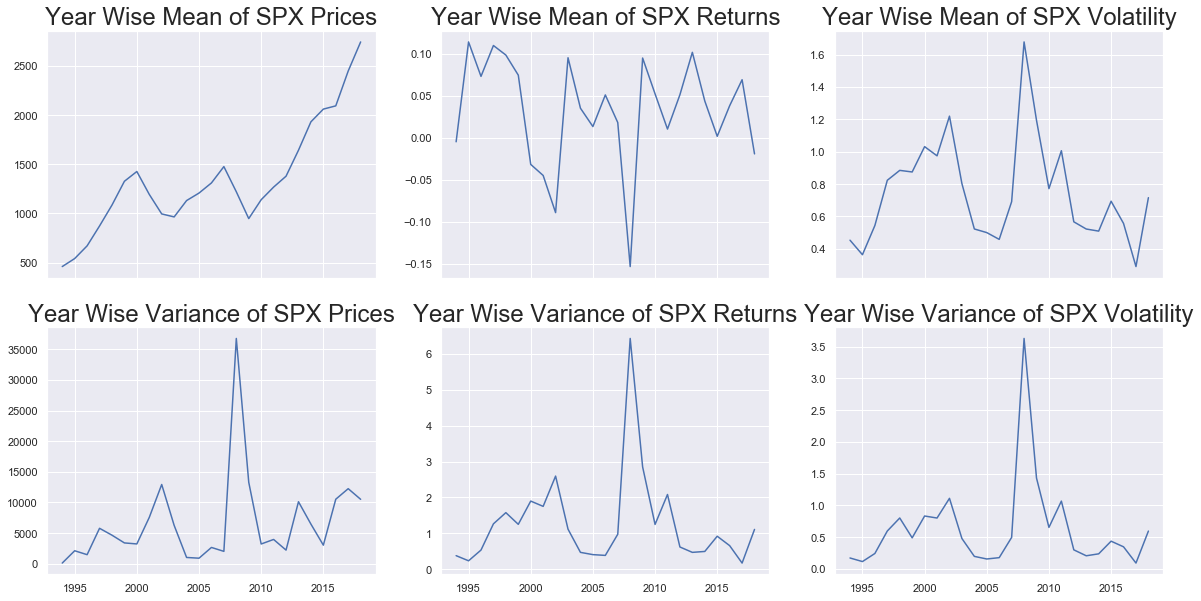

In [39]:
# Building dataframes to store yearly mean and variance
mean_df = train_df.groupby(by = train_df.index.year).mean()
var_df = train_df.groupby(by = train_df.index.year).var()

# Setting the figure size
plt.rcParams["figure.figsize"] = 20, 10

# Defining the subplots with shared x-axis
fig, ax = plt.subplots(2, 3, sharex = True)

# PLotting mean for the 3 series in the first row
ax[0, 0].plot(mean_df.spx)
ax[0, 1].plot(mean_df.spx_ret)
ax[0, 2].plot(mean_df.spx_vol)

# Setting title for the first row of plots
ax[0, 0].set_title("Year Wise Mean of SPX Prices", size = 24)
ax[0, 1].set_title("Year Wise Mean of SPX Returns", size = 24)
ax[0, 2].set_title("Year Wise Mean of SPX Volatility", size = 24)


# PLotting variance for the 3 series in the second row
ax[1, 0].plot(var_df.spx)
ax[1, 1].plot(var_df.spx_ret)
ax[1, 2].plot(var_df.spx_vol)

# Setting title for the second row of plots
ax[1, 0].set_title("Year Wise Variance of SPX Prices", size = 24)
ax[1, 1].set_title("Year Wise Variance of SPX Returns", size = 24)
ax[1, 2].set_title("Year Wise Variance of SPX Volatility", size = 24)

# Displaying the 
plt.show()

In [40]:
mean_df = train_df.groupby(by = train_df.index.year).mean()
var_df = train_df.groupby(by = train_df.index.year).var()

- **Mean**

In [41]:
mean_df

,spx,spx_ret,spx_vol,Year
Date,,,,
1994,460.212801,-0.004736,0.452997,1994
1995,541.571577,0.114115,0.363242,1995
1996,670.741947,0.073117,0.543670,1996
1997,872.981189,0.109858,0.823131,1997
1998,1085.262222,0.098502,0.884351,1998
1999,1327.237972,0.074586,0.874459,1999
2000,1426.546652,-0.031650,1.030979,2000
2001,1193.785482,-0.044805,0.974166,2001
2002,995.341075,-0.089034,1.219296,2002


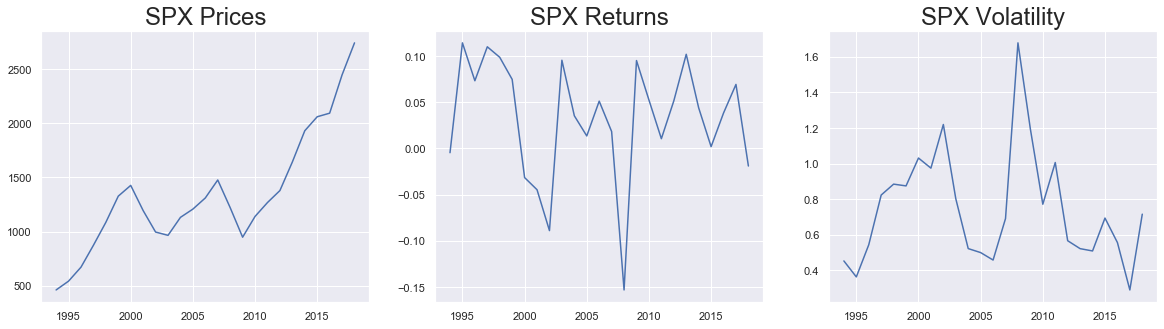

In [42]:
plt.rcParams["figure.figsize"] = 20, 5

fig, ax = plt.subplots(1, 3)

ax[0].plot(mean_df.spx)
ax[1].plot(mean_df.spx_ret)
ax[2].plot(mean_df.spx_vol)

ax[0].set_title("SPX Prices", size = 24)
ax[1].set_title("SPX Returns", size = 24)
ax[2].set_title("SPX Volatility", size = 24)

plt.show()

- **Variance**

In [43]:
var_df

,spx,spx_ret,spx_vol,Year
Date,,,,
1994,89.752512,0.377831,0.171843,0
1995,2100.811002,0.234782,0.115401,0
1996,1460.807832,0.534004,0.242661,0
1997,5768.277201,1.264757,0.596721,0
1998,4644.653211,1.577151,0.801807,0
1999,3380.992145,1.251251,0.489216,0
2000,3214.097866,1.899227,0.833211,0
2001,7550.150975,1.751891,0.801256,0
2002,12923.986338,2.595878,1.111436,0


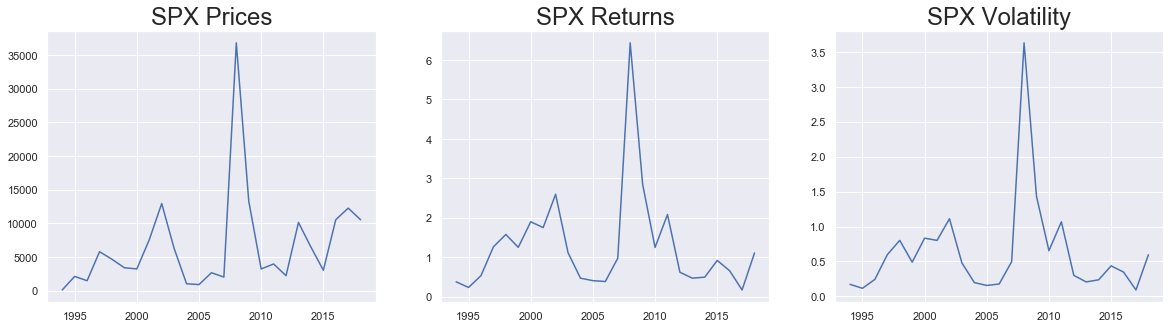

In [44]:
plt.rcParams["figure.figsize"] = 20, 5

fig, ax = plt.subplots(1, 3)

ax[0].plot(var_df.spx)
ax[1].plot(var_df.spx_ret)
ax[2].plot(var_df.spx_vol)

ax[0].set_title("SPX Prices", size = 24)
ax[1].set_title("SPX Returns", size = 24)
ax[2].set_title("SPX Volatility", size = 24)

plt.show()